##  Pre-processing and Training Data Development

In [1]:
import pandas as pd
import numpy as np

import gensim
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import TreebankWordTokenizer

from gensim.models.tfidfmodel import TfidfModel

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../data/data_cleaned_final.csv')

pd.set_option('display.max_colwidth',None)
data.head()

,job_title,location,connection,job_title_nostop,location_cleaned,combined
0,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"Houston, Texas",85.0,"['2019', 'ct', 'bauer', 'college', 'business', 'graduate', 'magna', 'cum', 'laude', 'aspiring', 'human', 'resources', 'professional']","['houston', 'texas']",2019 ct bauer college business graduate magna cum laude aspiring human resources professional houston texas
1,Native English Teacher at EPIK (English Program in Korea),Canada,500.0,"['native', 'english', 'teacher', 'epik', 'english', 'program', 'korea']",['canada'],native english teacher epik english program korea canada
2,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina",44.0,"['aspiring', 'human', 'resources', 'professional']","['raleigh', 'durham', 'north', 'carolina', '']",aspiring human resources professional raleigh durham north carolina
3,People Development Coordinator at Ryan,"Denton, Texas",500.0,"['people', 'development', 'coordinator', 'ryan']","['denton', 'texas']",people development coordinator ryan denton texas
4,Aspiring Human Resources Specialist,New York City,1.0,"['aspiring', 'human', 'resources', 'specialist']","['new', 'york', 'city', '']",aspiring human resources specialist new york city


### Feature Engineering

Displaying the combined column which contains the text combined with both the job title and location data

In [3]:
data['combined'].value_counts()

2019 ct bauer college business graduate magna cum laude aspiring human resources professional houston texas                          1
liberal arts major aspiring human resources analyst baton rouge louisiana                                                            1
senior human resources business partner heil environmental chattanooga tennessee                                                     1
aspiring human resources professional energetic teamfocused leader austin texas                                                      1
hr manager endemol shine north america los angeles california                                                                        1
human resources professional world leader gis software highland california                                                           1
rrp brand portfolio executive jti japan tobacco international philadelphia                                                           1
information systems specialist programmer love data org

In [4]:
# variable to train
X_train = data['combined'].values

In [5]:
print(X_train)

['2019 ct bauer college business graduate magna cum laude aspiring human resources professional houston texas'
 'native english teacher epik english program korea canada'
 'aspiring human resources professional raleigh durham north carolina '
 'people development coordinator ryan denton texas'
 'aspiring human resources specialist new york city '
 'student humber college aspiring human resources generalist canada'
 'hr senior specialist san francisco bay '
 'seeking human resources hris generalist positions philadelphia '
 'student chapman university lake forest california'
 'svp chro marketing communications csr officer engie houston woodlands energy gphr sphr houston texas '
 'human resources coordinator intercontinental buckhead atlanta atlanta georgia'
 'aspiring human resources management student seeking internship houston texas '
 'seeking human resources opportunities chicago illinois'
 'experienced retail manager aspiring human resources professional austin texas '
 'human reso

### Generate Document Vectors

#### Usuage of Gensim
Gensim is an open-source NLP library for building document or word vectors.</br>
With these vectors, we can then see relationships among the words or documents based on how near or far they are and also what similar comparisons we find.</br>
Gensim allows to build corpora and dictionaries using simple classes and functions.

### Tokenize words

In [6]:
tokenized_docs = [TreebankWordTokenizer().tokenize(doc) for doc in X_train]

In [7]:
print(tokenized_docs)

[['2019', 'ct', 'bauer', 'college', 'business', 'graduate', 'magna', 'cum', 'laude', 'aspiring', 'human', 'resources', 'professional', 'houston', 'texas'], ['native', 'english', 'teacher', 'epik', 'english', 'program', 'korea', 'canada'], ['aspiring', 'human', 'resources', 'professional', 'raleigh', 'durham', 'north', 'carolina'], ['people', 'development', 'coordinator', 'ryan', 'denton', 'texas'], ['aspiring', 'human', 'resources', 'specialist', 'new', 'york', 'city'], ['student', 'humber', 'college', 'aspiring', 'human', 'resources', 'generalist', 'canada'], ['hr', 'senior', 'specialist', 'san', 'francisco', 'bay'], ['seeking', 'human', 'resources', 'hris', 'generalist', 'positions', 'philadelphia'], ['student', 'chapman', 'university', 'lake', 'forest', 'california'], ['svp', 'chro', 'marketing', 'communications', 'csr', 'officer', 'engie', 'houston', 'woodlands', 'energy', 'gphr', 'sphr', 'houston', 'texas'], ['human', 'resources', 'coordinator', 'intercontinental', 'buckhead', 'at

### Create bigram

Topic models make more sense when 'New' and 'York' are treated as 'New York' - we can do this by creating a bigram model and modifying our corpus accordingly. </br>
Scoring for bigram phrases, the default is the PMI-like scoring as described in Mikolov, et. al: “Distributed Representations of Words and Phrases and their Compositionality”.

In [8]:
from gensim.models.phrases import Phrases

In [9]:
#Build a Bigram
bigram = Phrases(tokenized_docs, min_count=1, threshold=1) #train model
tokenized_docs_bigram= [bigram[line] for line in tokenized_docs]

In [10]:
for phrase, score in bigram.find_phrases(tokenized_docs).items():
    print(phrase, score)

aspiring_human 15.258064516129034
resources_professional 12.483870967741936
houston_texas 38.22222222222222
raleigh_durham 114.66666666666666
north_carolina 51.6
resources_specialist 4.161290322580645
new_york 82.56
resources_generalist 8.32258064516129
seeking_human 5.548387096774194
human_resources 16.10822060353798
resources_management 2.774193548387097
seeking_internship 28.666666666666664
retail_manager 36.857142857142854
austin_texas 28.666666666666664
director_human 5.548387096774194
north_america 51.6
manager_seeking 8.19047619047619
business_management 17.2
major_aspiring 14.333333333333332
resources_manager 4.755760368663594
information_systems 129.0
los_angeles 129.0
management_major 28.666666666666664
long_beach 64.5
resources_position 5.548387096774194


In [11]:
tokenized_docs_bigram

[['2019',
  'ct',
  'bauer',
  'college',
  'business',
  'graduate',
  'magna',
  'cum',
  'laude',
  'aspiring_human',
  'resources_professional',
  'houston_texas'],
 ['native',
  'english',
  'teacher',
  'epik',
  'english',
  'program',
  'korea',
  'canada'],
 ['aspiring_human',
  'resources_professional',
  'raleigh_durham',
  'north_carolina'],
 ['people', 'development', 'coordinator', 'ryan', 'denton', 'texas'],
 ['aspiring_human', 'resources_specialist', 'new_york', 'city'],
 ['student',
  'humber',
  'college',
  'aspiring_human',
  'resources_generalist',
  'canada'],
 ['hr', 'senior', 'specialist', 'san', 'francisco', 'bay'],
 ['seeking_human',
  'resources',
  'hris',
  'generalist',
  'positions',
  'philadelphia'],
 ['student', 'chapman', 'university', 'lake', 'forest', 'california'],
 ['svp',
  'chro',
  'marketing',
  'communications',
  'csr',
  'officer',
  'engie',
  'houston',
  'woodlands',
  'energy',
  'gphr',
  'sphr',
  'houston_texas'],
 ['human_resources',

### Create Dictionary needed for Topic Modeling

In [12]:
# create a dictionary from the job_title and location containing the number of times a word appears in the training set.
#This creates a mapping for Ids for each token
dictionary = Dictionary(tokenized_docs_bigram) 

In [13]:
print(dictionary)

Dictionary(236 unique tokens: ['2019', 'aspiring_human', 'bauer', 'business', 'college']...)


In [14]:
print(dictionary.token2id)

{'2019': 0, 'aspiring_human': 1, 'bauer': 2, 'business': 3, 'college': 4, 'ct': 5, 'cum': 6, 'graduate': 7, 'houston_texas': 8, 'laude': 9, 'magna': 10, 'resources_professional': 11, 'canada': 12, 'english': 13, 'epik': 14, 'korea': 15, 'native': 16, 'program': 17, 'teacher': 18, 'north_carolina': 19, 'raleigh_durham': 20, 'coordinator': 21, 'denton': 22, 'development': 23, 'people': 24, 'ryan': 25, 'texas': 26, 'city': 27, 'new_york': 28, 'resources_specialist': 29, 'humber': 30, 'resources_generalist': 31, 'student': 32, 'bay': 33, 'francisco': 34, 'hr': 35, 'san': 36, 'senior': 37, 'specialist': 38, 'generalist': 39, 'hris': 40, 'philadelphia': 41, 'positions': 42, 'resources': 43, 'seeking_human': 44, 'california': 45, 'chapman': 46, 'forest': 47, 'lake': 48, 'university': 49, 'chro': 50, 'communications': 51, 'csr': 52, 'energy': 53, 'engie': 54, 'gphr': 55, 'houston': 56, 'marketing': 57, 'officer': 58, 'sphr': 59, 'svp': 60, 'woodlands': 61, 'atlanta': 62, 'buckhead': 63, 'georg

### Create a Bag of Words Corpus

Bag of words corpora in the Gensim library are based on dictionaries and contain the ID of each word along with the frequency of occurrence of the word.

In [15]:
# Create a gensim corpus
# This ia bag of words for the text in the format (token_id, token_count) 2 tuples

#dictionary.token2id
bow_corpus = [dictionary.doc2bow(token) for token in tokenized_docs_bigram]
print(bow_corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(1, 1), (11, 1), (19, 1), (20, 1)], [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(1, 1), (27, 1), (28, 1), (29, 1)], [(1, 1), (4, 1), (12, 1), (30, 1), (31, 1), (32, 1)], [(33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)], [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)], [(32, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)], [(8, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)], [(21, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1)], [(1, 1), (8, 1), (32, 1), (67, 1), (68, 1)], [(43, 1), (44, 1), (69, 1), (70, 1), (71, 1)], [(1, 1), (11, 1), (72, 1), (73, 1), (74, 1)], [(65, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1)], [(27, 1), (28, 1), (38, 1), (65, 1), (80, 1)], [(43, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87

What do these tuples mean? Let’s convert them into human readable format to understand:

In [16]:
[[(dictionary[i], freq) for i, freq in doc] for doc in bow_corpus[:3]]

[[('2019', 1),
  ('aspiring_human', 1),
  ('bauer', 1),
  ('business', 1),
  ('college', 1),
  ('ct', 1),
  ('cum', 1),
  ('graduate', 1),
  ('houston_texas', 1),
  ('laude', 1),
  ('magna', 1),
  ('resources_professional', 1)],
 [('canada', 1),
  ('english', 2),
  ('epik', 1),
  ('korea', 1),
  ('native', 1),
  ('program', 1),
  ('teacher', 1)],
 [('aspiring_human', 1),
  ('resources_professional', 1),
  ('north_carolina', 1),
  ('raleigh_durham', 1)]]

### TF-IDF with Gensim

Building a TF-IDF model using gensim model. </br>
The tf-idf model transforms vectors from the bag-of-words representation to a vector space where the frequency counts are weighted according to the relative rarity of each word in the corpus.

In [17]:
tfidf = TfidfModel(bow_corpus) # step 1 -- initialize a model

#tfidf is treated as a read-only object that can be used to convert any vector from the old 
#representation (bag-of-words integer counts) to the new representation 

corpus_tfidf = tfidf[bow_corpus] # step 2 Apply transformation to the entire corpus 

In [18]:
for doc, as_text in zip(corpus_tfidf, X_train):
    print(doc, as_text, end='\n\n') 

[(0, 0.33249872454322044), (1, 0.13577674153068667), (2, 0.33249872454322044), (3, 0.2386384851773402), (4, 0.2732795068499476), (5, 0.33249872454322044), (6, 0.33249872454322044), (7, 0.33249872454322044), (8, 0.1949959592239595), (9, 0.33249872454322044), (10, 0.33249872454322044), (11, 0.1949959592239595)] 2019 ct bauer college business graduate magna cum laude aspiring human resources professional houston texas

[(12, 0.2642287470777187), (13, 0.6429733601593075), (14, 0.32148668007965375), (15, 0.32148668007965375), (16, 0.32148668007965375), (17, 0.32148668007965375), (18, 0.32148668007965375)] native english teacher epik english program korea canada

[(1, 0.32896328403055086), (11, 0.4724410852392083), (19, 0.5781792882566074), (20, 0.5781792882566074)] aspiring human resources professional raleigh durham north carolina 

[(21, 0.35530268870431103), (22, 0.4322961944081207), (23, 0.4322961944081207), (24, 0.4322961944081207), (25, 0.4322961944081207), (26, 0.35530268870431103)] 

In [19]:
#The model can then be applied to any particular document of interest:
corpus_tfidf[1]

[(12, 0.2642287470777187),
 (13, 0.6429733601593075),
 (14, 0.32148668007965375),
 (15, 0.32148668007965375),
 (16, 0.32148668007965375),
 (17, 0.32148668007965375),
 (18, 0.32148668007965375)]

#### The most relevant term in document 1 is then term number 13

In [20]:
#looking up the word in the dictionary
dictionary[13]

'english'

'english' is the most relevant term in that document

And now we see the top five terms for this particular document:

In [21]:
from gensim.similarities import SparseMatrixSimilarity

In [22]:
index = SparseMatrixSimilarity(corpus_tfidf, num_features = len(dictionary))

In [23]:
sims = index[corpus_tfidf[1]]
print(list(enumerate(sims)))

[(0, 0.0), (1, 1.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.11127411), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 0.0), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.0), (46, 0.0), (47, 0.0), (48, 0.0)]


Here the 2nd job title is closest to the 6th title

In [24]:
print(data['combined'].iloc[1])
print(data['combined'].iloc[5])

native english teacher epik english program korea canada
student humber college aspiring human resources generalist canada


### Check for unseen data

In [25]:
query_doc = "aspiring human resources".split()
query_bow = dictionary.doc2bow(query_doc)

In [26]:
sims1 = index[tfidf[query_bow]]

In [27]:
result = list(enumerate(sims1))
[x for x in result if x[1] > 0]

[(7, 0.2951146),
 (12, 0.3514209),
 (16, 0.22665311),
 (22, 0.21617906),
 (35, 0.36837038)]

In [28]:
#print the documents that are closest to the unseen data
print(data['combined'].iloc[7])
print(data['combined'].iloc[12])
print(data['combined'].iloc[16])
print(data['combined'].iloc[22])
print(data['combined'].iloc[35])

seeking human resources hris generalist positions philadelphia 
seeking human resources opportunities chicago illinois
director human resources north america groupe beneteau grand rapids michigan 
nortia staffing seeking human resources payroll administrative professionals  san jose california
director human resources ey atlanta 


### Topic Modelling

Topic Modelling refers to the probabilistic modelling of text documents as topics.

In [29]:
from gensim.models import LdaModel, LsiModel, HdpModel

In [30]:
# for LSI and LDA we are calculating num of topics 
num_topics = 20

In [31]:
def visualize_top_words(model):
    n_words = 10
    topic_words = pd.DataFrame({})
    
    for i, topic in enumerate(model.get_topics()[:5]):
        top_feature_ids = topic.argsort()[-n_words:][::-1]
        feature_values = topic[top_feature_ids]
        words = [dictionary[id] for id in top_feature_ids]
        topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
        topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

    return topic_words

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def display(df):
    g = sns.FacetGrid(df, col="topic", col_wrap=3, sharey=False)
    g.map(plt.barh, "word", "value");

#### LSI - Latent Semantic Indexing
An information retrieval method which works by decomposing the original matric of words to maintain key topics

In [33]:
lsimodel = LsiModel(corpus=bow_corpus, num_topics=num_topics, id2word=dictionary)
lsimodel.show_topics(num_topics=5)  # showing only the top 5 topics

[(0,
  '-0.622*"human_resources" + -0.391*"aspiring_human" + -0.180*"resources_professional" + -0.174*"new_york" + -0.147*"houston_texas" + -0.135*"position" + -0.133*"resources_manager" + -0.121*"california" + -0.108*"virginia" + -0.104*"north_carolina"'),
 (1,
  '-0.465*"aspiring_human" + 0.424*"human_resources" + -0.324*"resources_professional" + -0.251*"new_york" + -0.189*"houston_texas" + -0.141*"student" + -0.134*"college" + 0.118*"virginia" + 0.117*"management" + 0.110*"california"'),
 (2,
  '-0.387*"university" + -0.385*"student" + -0.346*"california" + -0.308*"indiana" + -0.176*"resources" + -0.165*"business_management" + -0.156*"retail_manager" + -0.154*"delphi" + -0.154*"lafayette" + -0.154*"kokomo"'),
 (3,
  '-0.367*"california" + -0.320*"resources" + -0.260*"seeking_human" + 0.235*"indiana" + 0.225*"student" + 0.196*"university" + -0.156*"new_york" + -0.148*"san" + -0.136*"staffing" + 0.134*"business_management"'),
 (4,
  '0.365*"houston_texas" + -0.293*"new_york" + 0.214*

#### Visualize LSI top topics

In [34]:
df_lsi = visualize_top_words(model=lsimodel)      
df_lsi.head()

,value,word,topic
0,-0.000088,logging,0
1,-0.000088,excellence,0
2,-0.000088,director,0
3,-0.000088,katy,0
4,-0.000088,administration,0


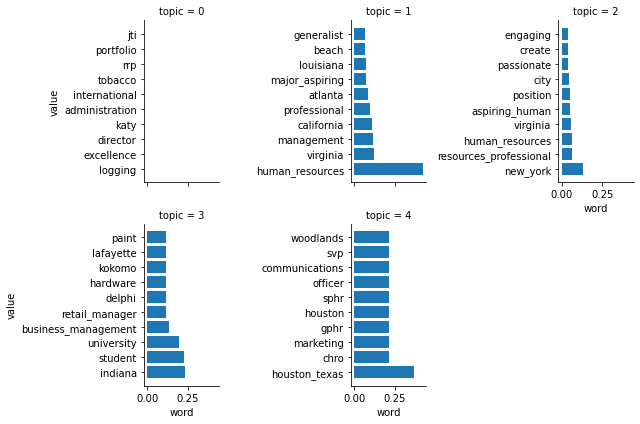

In [35]:
display(df_lsi)

#### HDP - Hierarchical Dirichlet Process
HDP is an unsupervised topic model which figures out the number of topics on its own

In [36]:
hdpmodel = HdpModel(corpus=bow_corpus,id2word=dictionary)
hdpmodel.show_topics(num_topics=5)  #shows the top 5 topics

[(0,
  '0.025*customer + 0.022*louisiana + 0.018*rapids + 0.017*positions + 0.016*st + 0.015*endemol + 0.014*louis + 0.013*community + 0.013*aspiring_human + 0.013*logging + 0.012*energy + 0.012*illinois + 0.012*intercontinental + 0.011*boston + 0.011*development + 0.011*laude + 0.011*worth + 0.011*arts + 0.011*mississippi + 0.010*within'),
 (1,
  '0.022*excellence + 0.020*denton + 0.019*liberal + 0.016*center + 0.016*graduate + 0.016*world + 0.014*position + 0.014*passionate + 0.014*retail_manager + 0.013*junior + 0.013*love + 0.012*university + 0.012*travelers + 0.012*gaithersburg + 0.011*cum + 0.011*english + 0.011*administrative + 0.011*resources_generalist + 0.011*care + 0.010*paint'),
 (2,
  '0.026*analyst + 0.022*always + 0.020*lab + 0.017*houston_texas + 0.017*georgia + 0.016*position + 0.015*laude + 0.015*generalist + 0.015*baton + 0.014*csr + 0.014*hr + 0.013*california + 0.013*work + 0.013*beneteau + 0.012*san + 0.011*payroll + 0.011*illinois + 0.011*myrtle + 0.011*national 

In [37]:
topics_num = hdpmodel.get_topics()
topics_num.shape[0]

150

Total number of topics for HDP is 150

#### Visualize top HDP topics

In [38]:
df_hdp = visualize_top_words(model=hdpmodel)      
df_hdp.head()

,value,word,topic
0,0.024652,customer,0
1,0.022438,louisiana,0
2,0.018328,rapids,0
3,0.017190,positions,0
4,0.015733,st,0


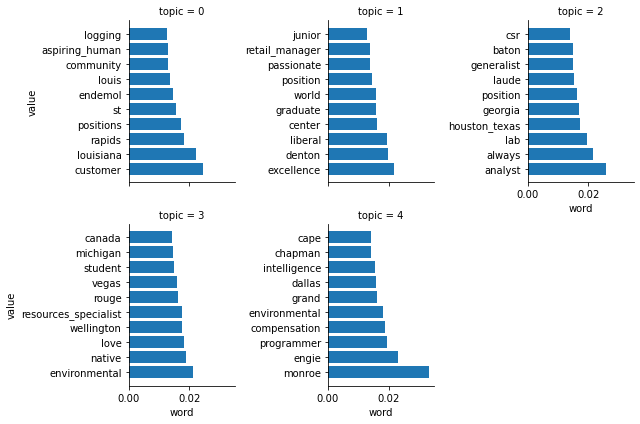

In [39]:
display(df_hdp)

#### LDA - Latent Dirichlet Allocation

In [40]:
ldamodel = LdaModel(corpus=bow_corpus, num_topics=num_topics, id2word=dictionary)

# each element of the list is a tuple 
# containing the topic and word / probability list
#topics = ldamodel.show_topics(num_words = 10, formatted = False)num_topics=5
topics = ldamodel.show_topics(num_topics=5, num_words = 10, formatted = False)
topics

[(13,
  [('houston_texas', 0.038938392),
   ('environmental', 0.021455478),
   ('chattanooga', 0.021455465),
   ('resources_management', 0.021455465),
   ('manager', 0.021455456),
   ('assistant', 0.02145545),
   ('atlanta', 0.02145545),
   ('business', 0.021455418),
   ('undergraduate', 0.021455398),
   ('north_america', 0.021455398)]),
 (8,
  [('aspiring_human', 0.07649104),
   ('resources_professional', 0.07649011),
   ('hris', 0.03917865),
   ('positions', 0.03917861),
   ('austin_texas', 0.03917852),
   ('resources', 0.03917842),
   ('north_carolina', 0.039178416),
   ('generalist', 0.039178118),
   ('seeking_human', 0.039177988),
   ('raleigh_durham', 0.039177936)]),
 (6,
  [('illinois', 0.05890771),
   ('university', 0.058907155),
   ('chicago', 0.058906585),
   ('official', 0.030172382),
   ('teamfocused', 0.030172238),
   ('massachusetts', 0.030172234),
   ('seeking_human', 0.030172138),
   ('state', 0.030172115),
   ('bridgewater', 0.030172095),
   ('austin_texas', 0.03017207

show_topics() from the model, will output the most probable words that appear in each topic. For the gensim library, the default printing behavior is to print a linear combination of the top words sorted in decreasing order of the probability of the word appearing in that topic. Thus words that appear towards the left are the ones that are more indicative of the topic.

In [44]:
df_lda = visualize_top_words(model=ldamodel)      
df_lda.head()

,value,word,topic
0,0.053029,carolina,0
1,0.053029,information_systems,0
2,0.053029,beach,0
3,0.053029,myrtle,0
4,0.053029,mes,0


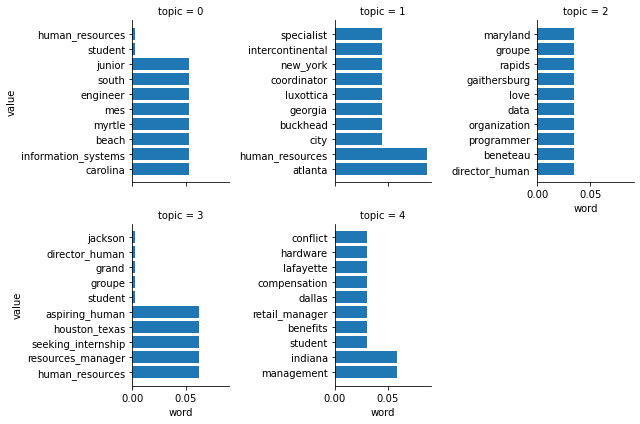

In [45]:
display(df_lda)

In [46]:
print(ldamodel.get_term_topics('human_resources'))

[(1, 0.06760562), (2, 0.020058794), (3, 0.037282668), (4, 0.017719677), (5, 0.037242465), (9, 0.052047122), (12, 0.034025475), (13, 0.0125476485), (16, 0.020743454), (17, 0.020743178)]


The get_document_topics method outputs the topic distribution of the document. Apart from this, it also let us know the topic distribution for each word in the document.

### Model Evaluation
#### Topic Coherence is a measure that is used to evaluate topic models.

In [48]:
from gensim.models.coherencemodel import CoherenceModel

In [49]:
lsi_coherence = CoherenceModel(model=lsimodel, corpus=bow_corpus, texts = tokenized_docs_bigram, coherence='c_v')
hdp_coherence = CoherenceModel(model=hdpmodel, corpus=bow_corpus, texts = tokenized_docs_bigram, coherence='c_v')
lda_coherence = CoherenceModel(model=ldamodel, corpus=bow_corpus, texts = tokenized_docs_bigram, coherence='c_v')

In [50]:
# higher coherence score is better
print('LSI Model coherence :', lsi_coherence.get_coherence())
print('HDP Model coherence :', hdp_coherence.get_coherence())
print('LDA Model coherence :', lda_coherence.get_coherence())

LSI Model coherence : 0.3692450436643109
HDP Model coherence : 0.7871911638720094
LDA Model coherence : 0.4021522233942335


#### Finding the optimum number of topics for LDA

In [51]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

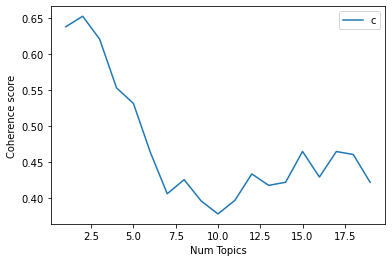

In [52]:
#Create a model list and plot Coherence score against a number of topics

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=tokenized_docs_bigram, limit=20, start=1, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=20; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [53]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.6379
Num Topics = 2  has Coherence Value of 0.6525
Num Topics = 3  has Coherence Value of 0.6207
Num Topics = 4  has Coherence Value of 0.553
Num Topics = 5  has Coherence Value of 0.5313
Num Topics = 6  has Coherence Value of 0.4633
Num Topics = 7  has Coherence Value of 0.4058
Num Topics = 8  has Coherence Value of 0.4253
Num Topics = 9  has Coherence Value of 0.3959
Num Topics = 10  has Coherence Value of 0.3777
Num Topics = 11  has Coherence Value of 0.3965
Num Topics = 12  has Coherence Value of 0.4333
Num Topics = 13  has Coherence Value of 0.4174
Num Topics = 14  has Coherence Value of 0.4217
Num Topics = 15  has Coherence Value of 0.4646
Num Topics = 16  has Coherence Value of 0.429
Num Topics = 17  has Coherence Value of 0.4645
Num Topics = 18  has Coherence Value of 0.4603
Num Topics = 19  has Coherence Value of 0.4216


In [54]:
best_result_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_result_index]
# Select the model and print the topics
model_topics = optimal_model.show_topics(formatted=False)
print(f'''The {x[best_result_index]} topics gives the highest coherence score \\
of {coherence_values[best_result_index]}''')

The 2 topics gives the highest coherence score \
of 0.6525069908987882


The last step is to find the optimal number of topics.We need to build many LDA models with different values of the number of topics (k) and pick the one that gives the highest coherence value. Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics. If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

### Visualization with PyLDAvis

In [41]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [42]:
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(ldamodel, bow_corpus, dictionary)

In [43]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.084650 -0.078556       1        1  10.676211
9      0.115216 -0.077778       2        1  10.399012
12     0.122339 -0.009973       3        1   9.531765
5      0.151695  0.029167       4        1   8.422022
4     -0.011567  0.027385       5        1   6.764358
6      0.015026  0.185198       6        1   6.309408
2     -0.058308 -0.045530       7        1   5.401556
17    -0.074142 -0.076194       8        1   5.328173
16     0.005278  0.011123       9        1   5.323010
7     -0.053450  0.008511      10        1   5.323010
15    -0.119014  0.022325      11        1   5.034956
8      0.041436  0.143392      12        1   4.249610
1      0.010371 -0.091500      13        1   3.604885
14    -0.081139 -0.009308      14        1   3.038371
0     -0.076344 -0.010323      15        1   2.680306
18    -0.012980 -0.029819      16        1   2.108140
3      0.047021 -0.023373      17        1   1.824363
11    -0.044841  0.028426      18        1   1.824363
10    -0.039175 -0.004128      19        1   1.543355
19    -0.022070  0.000953      20        1   0.613124, topic_info=                    Term       Freq      Total Category  logprob  loglift
1         aspiring_human   6.000000   6.000000  Default  30.0000  30.0000
65       human_resources  10.000000  10.000000  Default  29.0000  29.0000
8          houston_texas   3.000000   3.000000  Default  28.0000  28.0000
28              new_york   3.000000   3.000000  Default  27.0000  27.0000
62               atlanta   2.000000   2.000000  Default  26.0000  26.0000
..                   ...        ...        ...      ...      ...      ...
21           coordinator   0.008937   1.542080  Topic20  -5.4638  -0.0563
26                 texas   0.008937   1.636121  Topic20  -5.4638  -0.1155
27                  city   0.008937   2.188376  Topic20  -5.4638  -0.4064
28              new_york   0.008937   3.589610  Topic20  -5.4638  -0.9012
29  resources_specialist   0.008937   1.259931  Topic20  -5.4638   0.1458

[909 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         4  0.820658            2019
215       2  0.793687            2020
231       8  0.864544  administration
107       9  0.864992  administrative
195       3  0.804996      admissions
...     ...       ...             ...
194      10  0.892890          within
61        1  0.792947       woodlands
118       3  0.804993            work
155       2  0.793690           world
128       5  0.826261           worth

[289 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 10, 13, 6, 5, 7, 3, 18, 17, 8, 16, 9, 2, 15, 1, 19, 4, 12, 11, 20])

#### Interpret pyLDAvis’s output

* A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.</br>
* Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.</br>

* Blue bars represent the overall frequency of each word in the corpus. If no topic is selected, the blue bars of the most frequently used words will be displayed.</br>
* Red bars give the estimated number of times a given term was generated by a given topic
* The word with the longest red bar is the word that is used the most by the texts belonging to that topic.

### Testing model on unseen data

#### Using LDA model

#### Print the topic associations with the documents for LDA

In [55]:
# printing the topic associations with the original documents for the LDA model
count = 0
for i in ldamodel[bow_corpus]:
    print('doc : ', count, i)
    count += 1

doc :  0 [(5, 0.9269225)]
doc :  1 [(15, 0.894444)]
doc :  2 [(0, 0.010000036), (1, 0.010000036), (2, 0.010000036), (3, 0.010000036), (4, 0.010000036), (5, 0.010000036), (6, 0.010000036), (7, 0.010000036), (8, 0.80999935), (9, 0.010000036), (10, 0.010000036), (11, 0.010000036), (12, 0.010000036), (13, 0.010000036), (14, 0.010000036), (15, 0.010000036), (16, 0.010000036), (17, 0.010000036), (18, 0.010000036), (19, 0.010000036)]
doc :  3 [(14, 0.8642852)]
doc :  4 [(0, 0.010000079), (1, 0.010000079), (2, 0.010000079), (3, 0.010000079), (4, 0.010000079), (5, 0.010000079), (6, 0.010000079), (7, 0.010000079), (8, 0.010000079), (9, 0.8099985), (10, 0.010000079), (11, 0.010000079), (12, 0.010000079), (13, 0.010000079), (14, 0.010000079), (15, 0.010000079), (16, 0.010000079), (17, 0.010000079), (18, 0.01000008), (19, 0.010000079)]
doc :  5 [(9, 0.8642846)]
doc :  6 [(5, 0.86428463)]
doc :  7 [(8, 0.86428505)]
doc :  8 [(12, 0.86428463)]
doc :  9 [(13, 0.9321421)]
doc :  10 [(1, 0.8812496)]
doc

In [56]:
# creating a dataframe to store the associated topics for each document
def get_max(doc):
        idx,l = zip(*doc)
        return idx[np.argmax(l)]

data['doc_topic'] = [get_max(doc) for doc in ldamodel.get_document_topics(bow_corpus)]

In [57]:
df1 = data[['combined', 'doc_topic']]
df1.head(10)

,combined,doc_topic
0,2019 ct bauer college business graduate magna cum laude aspiring human resources professional houston texas,5
1,native english teacher epik english program korea canada,15
2,aspiring human resources professional raleigh durham north carolina,8
3,people development coordinator ryan denton texas,14
4,aspiring human resources specialist new york city,9
5,student humber college aspiring human resources generalist canada,9
6,hr senior specialist san francisco bay,5
7,seeking human resources hris generalist positions philadelphia,8
8,student chapman university lake forest california,12
9,svp chro marketing communications csr officer engie houston woodlands energy gphr sphr houston texas,13


#### Unseen Text - 1

In [58]:
test_doc = 'aspiring human resources'
bow_test_doc = dictionary.doc2bow(test_doc.split())

print(ldamodel.get_document_topics(bow_test_doc))

[(0, 0.025000133), (1, 0.025000133), (2, 0.025000133), (3, 0.025000133), (4, 0.025000133), (5, 0.025000133), (6, 0.025000133), (7, 0.025000133), (8, 0.025000133), (9, 0.025000133), (10, 0.025000133), (11, 0.025000133), (12, 0.025000133), (13, 0.025000133), (14, 0.5249975), (15, 0.025000133), (16, 0.025000146), (17, 0.025000133), (18, 0.025000133), (19, 0.025000133)]


The unseen text has a higher probability with topic 2 

In [60]:
df1.loc[df1['doc_topic'] == 2]

,combined,doc_topic
16,director human resources north america groupe beneteau grand rapids michigan,2
21,human resources professional boston,2
32,information systems specialist programmer love data organization gaithersburg maryland,2


In [ ]:
The above list shows all the documents that are displayed for the unseen text

#### Unseen Text - 2

In [61]:
unseen_text = "seeking english teacher"
bow_unseen = dictionary.doc2bow(unseen_text.split())

print(ldamodel.get_document_topics(bow_unseen))

[(0, 0.012500164), (1, 0.012500164), (2, 0.012500164), (3, 0.012500164), (4, 0.012500164), (5, 0.012500164), (6, 0.012500164), (7, 0.26249456), (8, 0.012500164), (9, 0.012500164), (10, 0.012500164), (11, 0.012500164), (12, 0.012500164), (13, 0.012500164), (14, 0.012500164), (15, 0.5125025), (16, 0.012500164), (17, 0.012500164), (18, 0.012500164), (19, 0.012500164)]


The unseen text has a higher probability with topic 5

In [62]:
df1.loc[df1['doc_topic'] == 5]

,combined,doc_topic
0,2019 ct bauer college business graduate magna cum laude aspiring human resources professional houston texas,5
6,hr senior specialist san francisco bay,5
18,human resources generalist scottmadden inc raleigh durham north carolina,5
42,student houston texas,5
45,human resources generalist loparex raleigh durham north carolina,5


## Using Doc2Vec

Vector representation of entire sentence </br>

In Gensim, Paragraph Vector model is referred as Doc2Vec.</br>

Le and Mikolov in 2014 introduced the Doc2Vec algorithm <https://cs.stanford.edu/~quocle/paragraph_vector.pdf>, which usually outperforms such simple-averaging of Word2Vec vectors.</br>

There are two implementations:</br>

* Paragraph Vector - Distributed Memory (PV-DM)
* Paragraph Vector - Distributed Bag of Words (PV-DBOW)

PV-DM is analogous to Word2Vec CBOW. The doc-vectors are obtained by training a neural network on the synthetic task of predicting a center word based an average of both context word-vectors and the full document's doc-vector.</br>

PV-DBOW is analogous to Word2Vec SG. The doc-vectors are obtained by training a neural network on the synthetic task of predicting a target word just from the full document's doc-vector. (It is also common to combine this with skip-gram testing, using both the doc-vector and nearby word-vectors to predict a single target word, but only one at a time.)</br>

In [63]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [64]:
tagged_data = [TaggedDocument(words=TreebankWordTokenizer().tokenize(d), tags=[str(i)]) for i, d in enumerate(X_train)]

In [65]:
tagged_data

[TaggedDocument(words=['2019', 'ct', 'bauer', 'college', 'business', 'graduate', 'magna', 'cum', 'laude', 'aspiring', 'human', 'resources', 'professional', 'houston', 'texas'], tags=['0']),
 TaggedDocument(words=['native', 'english', 'teacher', 'epik', 'english', 'program', 'korea', 'canada'], tags=['1']),
 TaggedDocument(words=['aspiring', 'human', 'resources', 'professional', 'raleigh', 'durham', 'north', 'carolina'], tags=['2']),
 TaggedDocument(words=['people', 'development', 'coordinator', 'ryan', 'denton', 'texas'], tags=['3']),
 TaggedDocument(words=['aspiring', 'human', 'resources', 'specialist', 'new', 'york', 'city'], tags=['4']),
 TaggedDocument(words=['student', 'humber', 'college', 'aspiring', 'human', 'resources', 'generalist', 'canada'], tags=['5']),
 TaggedDocument(words=['hr', 'senior', 'specialist', 'san', 'francisco', 'bay'], tags=['6']),
 TaggedDocument(words=['seeking', 'human', 'resources', 'hris', 'generalist', 'positions', 'philadelphia'], tags=['7']),
 TaggedDo

### Training the Model

Now, we'll instantiate a Doc2Vec model with a vector size with 50 dimensions and iterating over the training corpus 40 times. We set the minimum word count to 2 in order to discard words with very few occurrences. (Without a variety of representative examples, retaining such infrequent words can often make a model worse!) Typical iteration counts in the published Paragraph Vector paper <https://cs.stanford.edu/~quocle/paragraph_vector.pdf>__ results, using 10s-of-thousands to millions of docs, are 10-20. More iterations take more time and eventually reach a point of diminishing returns.

However, this is a very very small dataset (49 documents) with shortish documents (a few hundred words). Adding training passes can sometimes help with such small datasets.

In [66]:
#d2v_model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)
d2v_model = Doc2Vec(vector_size=50, min_count=2, epochs=40)

#### Build a vocabulary

In [67]:
d2v_model.build_vocab(tagged_data)

Essentially, the vocabulary is a list (accessible via model.wv.index_to_key) of all of the unique words extracted from the training corpus. Additional attributes for each word are available using the model.wv.get_vecattr() method

In [68]:
print(f"Word 'human' appeared {d2v_model.wv.get_vecattr('human', 'count')} times in the training corpus.")

Word 'human' appeared 31 times in the training corpus.


#### Train the model 

Train the model on the corpus. If optimized Gensim (with BLAS library) is being used, this should take no more than 3 seconds. If the BLAS library is not being used, this should take no more than 2 minutes, so use optimized Gensim with BLAS 

In [69]:
d2v_model.train(tagged_data, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

#### Assessing the Model

To assess our new model, we'll first infer new vectors for each document of the training corpus, compare the inferred vectors with the training corpus, and then returning the rank of the document based on self-similarity. Basically, we're pretending as if the training corpus is some new unseen data and then seeing how they compare with the trained model. The expectation is that we've likely overfit our model (i.e., all of the ranks will be less than 2) and so we should be able to find similar documents very easily. Additionally, we'll keep track of the second ranks for a comparison of less similar documents.

In [70]:
tagged_data[2]

TaggedDocument(words=['aspiring', 'human', 'resources', 'professional', 'raleigh', 'durham', 'north', 'carolina'], tags=['2'])

In [71]:
similar_doc = d2v_model.dv.most_similar(2)

In [72]:
for doc_num, score in similar_doc:
    print(X_train[int(doc_num)], score)

bachelor science biology victoria university wellington baltimore maryland 0.4710063934326172
business management major aspiring human resources manager monroe louisiana  0.2905260920524597
hr manager endemol shine north america los angeles california 0.28008565306663513
hr senior specialist san francisco bay  0.24462348222732544
human resources generalist loparex raleigh durham north carolina  0.21143315732479095
2019 ct bauer college business graduate magna cum laude aspiring human resources professional houston texas 0.20833417773246765
human resources management major milpitas california 0.1959018111228943
director human resources north america groupe beneteau grand rapids michigan  0.19292792677879333
lead official western illinois university chicago  0.18737871944904327
svp chro marketing communications csr officer engie houston woodlands energy gphr sphr houston texas  0.15180712938308716


#### Test unseen data